Things to do 


1.   make the index look better (done)
2.   finish the speed up GRU block
3.   upload it with data onto Github
---------------------------------------------


tips for training

https://danijar.com/tips-for-training-recurrent-neural-networks/


# **Name country prediction using GRU**



In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import gzip # file reading
import csv # file reading


# **Data Preparations**

### Implement Dataloader

--------------------------------
a simple way to make dictionary

In [7]:
List1 =["a", "b", "c"]
List2 =[2,1,3]
List3 =dict(zip(List1, List2))
List3

{'a': 2, 'b': 1, 'c': 3}

#### Test case of each single code block

In [8]:
 # test case of each single code block

file_read = [['Maclean','English'],['Vajnichy','Russian'],['Usami','Japanese'],['Jackson','English'],['Zimmermann','Germany']]

# Read countries and names as list from data
countries = [item[1]for item in file_read]
# print(countries)
names = [item[0]for item in file_read]

countries_list = list(sorted(set(countries)))  #  latter for index to country
# print(country_list_test)

# Create a set from list 
countries_set = set(countries)


# iterate over the set to create a dictionary :countries_dic

def get_countries_dic (countries_set):
  countries_dic={}

  i = 0  # let class be 0 indexed
  for country in countries_set:
    countries_dic[country] = i
    i+=1
  return countries_dic
# Test get_countries_dic
w = get_countries_dic(countries_set)
print('countries_dic:',w)
print('*'*30)

# get item(idx)
countries_dic = get_countries_dic(countries_set)
def get_item(idx):

  return names[idx],countries_dic[countries[idx]]
# Test

print('test of get_item')
for idx in range(len(file_read)):
  naem,coun = get_item(idx)
  print(naem,coun)

def get_countries_num():
  return len(countries_dic)
print('*'*30)
print('test of get_countries_num')  
get_countries_num()


countries_dic: {'Germany': 0, 'English': 1, 'Japanese': 2, 'Russian': 3}
******************************
test of get_item
Maclean 1
Vajnichy 3
Usami 2
Jackson 1
Zimmermann 0
******************************
test of get_countries_num


4

#### Test of the wraped up class by using self designed debugging data 

In [9]:
# wrap them into class NameDataset

# using debugging data


class NameDataset(Dataset):
  def __init__(self,is_train_set=True):

    # For debug test_use: uncomment the following
    rows = [['Maclean','English'],['Vajnichy','Russian'],['Usami','Japanese'],['Jackson','English'],['Zimmermann','Germany']] # index begin with 1

    # read data from file (comment following block while debugging)
    # filename = '/content/names_test.csv.gz' if is_train_set else '/content/names_train.csv.gz'
    # with gzip.open(filename, 'rt') as f:
    #   reader = csv.reader(f)
    #   rows = list(reader)

    self.countries = [row[1]for row in rows]
    self.names = [row[0]for row in rows]
    self.countries_list = list(sorted(set(self.countries)))
    self.num_countries = len(self.countries_list)
    print('*'*30)
    print('Comment out when code debugging is passed')
    print('countries_list',self.countries_list)       #Comment out when code debugging is passed
    self.countries_dic = self.get_countries_dic()

    print('self.countries_dic',self.countries_dic)     #Comment out when code debugging is passed

  def __getitem__(self,idx):    # get name,country_index by idx

    return self.names[idx],self.countries_dic[self.countries[idx]]
    #return names[idx],self.countries_list[idx]

  def __len__(self):        # get dataset's lenth (how many names are there))
    return len(self.names)

  def get_countries_dic (self):  # helper funtion get countries_list-index dictionary , countries in ..dic and countries_list are arranged in same order

  # can also use enumerate , but more complex

    list1 = torch.arange( 0 , self.num_countries ).tolist()   # choose index begin with 1 because data started with index 1
    countries_dic = dict(zip(self.countries_list,list1))    # wrong! Should be self.countries_list
    return countries_dic

  def index2country(self,idx):# map  index of a name to a country in word  
    return self.countries_list[idx]   # minus one since countries_list is zero indexed
  def getCountriesNum(self):  # get total number of countries 
    return self.num_countries

# instantiate a dataset
dataloader_test_1 = NameDataset() 

# test __getitem__
print('*'*30)
print('test __getitem__;','expected: Usami,2')
print(dataloader_test_1[2])

# test index2country()
print('*'*30)
print('test index2country();','expected: Japanese')
print(dataloader_test_1.index2country(dataloader_test_1[2][1]))
# test get data set length
print('*'*30)
print('test getDataset length:' 'expected :5')
print(len(dataloader_test_1))
# test get num of countries
print('*'*30)
print('test getCountriesNum:' 'expected :4')
print(dataloader_test_1.getCountriesNum())


******************************
Comment out when code debugging is passed
countries_list ['English', 'Germany', 'Japanese', 'Russian']
self.countries_dic {'English': 0, 'Germany': 1, 'Japanese': 2, 'Russian': 3}
******************************
test __getitem__; expected: Usami,2
('Usami', 2)
******************************
test index2country(); expected: Japanese
Japanese
******************************
test getDataset length:expected :5
5
******************************
test getCountriesNum:expected :4
4


#### Test of the wraped up class by actual testing data

In [10]:
# wrap them into class NameDataset

# using actual test data


class NameDataset(Dataset):
  def __init__(self,is_train_set=True):    # Caution

    # For debug test_use: uncomment the following
    # rows = [['Maclean','English'],['Vajnichy','Russian'],['Usami','Japanese'],['Jackson','English'],['Zimmermann','Germany']]

    # read data from file (comment following block while debugging)
    filename =  '/content/names_train.csv.gz' if is_train_set else '/content/names_test.csv.gz'
    with gzip.open(filename, 'rt') as f:
      reader = csv.reader(f)
      rows = list(reader)

    self.countries = [row[1]for row in rows]
    self.names = [row[0]for row in rows]


    self.countries_list = list(sorted(set(self.countries)))
    self.num_countries = len(self.countries_list)
    print('*'*30)
    print('Comment out when code debugging is passed')
    print('countries_list',self.countries_list)       #Comment out when code debugging is passed
    self.countries_dic = self.get_countries_dic()
    print('self.countries_dic',self.countries_dic)     #Comment out when code debugging is passed

  def __getitem__(self,idx):

    return self.names[idx],self.countries_dic[self.countries[idx]]
    #return names[idx],self.countries_list[idx]

  def __len__(self):
    return len(self.names)

  def get_countries_dic (self):

    list1 = torch.arange(0,self.num_countries).tolist()  # index begin with 0 , when index began with 1 softmax hav to have dim= 1+ num_classes
    countries_dic = dict(zip(self.countries_list,list1))
    return countries_dic

  def index2country(self,idx):
    return self.countries_list[idx]
  def getCountriesNum(self):
    #return self.num_countries
    return self.num_countries

# instantiate a dataset
dataloader_test_2 = NameDataset(is_train_set=False) 

# test __getitem__
print('*'*30)
print('test __getitem__;[9]','expected: Bohac","2"')
print(dataloader_test_2[9])
print('test __getitem__;[1]','expected: Abl","2"') 
print(dataloader_test_2[1])
# test index2country()
print('*'*30)
print('test index2country();','expected: Czech')
print(dataloader_test_2.index2country(dataloader_test_2[2][1]))
# test get data set length
print('*'*30)
print('test getDataset length:' 'expected :6700')
print(len(dataloader_test_2))
# test get num of countries
print('*'*30)
print('test getCountriesNum:' 'expected :18')
print(dataloader_test_2.getCountriesNum())





******************************
Comment out when code debugging is passed
countries_list ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
self.countries_dic {'Arabic': 0, 'Chinese': 1, 'Czech': 2, 'Dutch': 3, 'English': 4, 'French': 5, 'German': 6, 'Greek': 7, 'Irish': 8, 'Italian': 9, 'Japanese': 10, 'Korean': 11, 'Polish': 12, 'Portuguese': 13, 'Russian': 14, 'Scottish': 15, 'Spanish': 16, 'Vietnamese': 17}
******************************
test __getitem__;[9] expected: Bohac","2"
('Borovka', 2)
test __getitem__;[1] expected: Abl","2"
('Alt', 2)
******************************
test index2country(); expected: Czech
Czech
******************************
test getDataset length:expected :6700
6700
******************************
test getCountriesNum:expected :18
18


In [11]:
list1 = torch.arange(1,3).tolist()
list1

[1, 2]

####**Class NameDataset is working,**




### Create the trainloader and the testloader

In [12]:

class NameDataset(Dataset):
  def __init__(self,is_train_set=True):    # Caution

    # For debug test_use: uncomment the following
    # rows = [['Maclean','English'],['Vajnichy','Russian'],['Usami','Japanese'],['Jackson','English'],['Zimmermann','Germany']]

    # read data from file (comment following block while debugging)
    filename =  '/content/names_train.csv.gz' if is_train_set else '/content/names_test.csv.gz'
    with gzip.open(filename, 'rt') as f:
      reader = csv.reader(f)
      rows = list(reader)

    self.countries = [row[1]for row in rows]
    self.names = [row[0]for row in rows]


    self.countries_list = list(sorted(set(self.countries)))
    self.num_countries = len(self.countries_list)
    #print('*'*30)
    #print('Comment out when code debugging is passed')
    #print('countries_list',self.countries_list)       #Comment out when code debugging is passed
    self.countries_dic = self.get_countries_dic()
    #print('self.countries_dic',self.countries_dic)     #Comment out when code debugging is passed

  def __getitem__(self,idx):

    return self.names[idx],self.countries_dic[self.countries[idx]]
    #return names[idx],self.countries_list[idx]

  def __len__(self):
    return len(self.names)

  def get_countries_dic (self):

    list1 = torch.arange(0,self.num_countries).tolist()  # index begin with 0 , when index began with 1 softmax hav to have dim= 1+ num_classes
    countries_dic = dict(zip(self.countries_list,list1))
    return countries_dic

  def index2country(self,idx):
    return self.countries_list[idx]
  def getCountriesNum(self):
    #return self.num_countries
    return self.num_countries

In [139]:
batch_size = 16

from torch.utils.data.dataloader import DataLoader

trainset = NameDataset(is_train_set=True,)   # Drop_last beacuse: total number of data= 7600 , and 7600 is not Divisible by batch_size=256
testset = NameDataset(is_train_set=False)
trainloader = DataLoader(trainset,batch_size=batch_size,shuffle=True,drop_last=True) 
testloader = DataLoader(testset,batch_size=batch_size,shuffle=False,drop_last=True)




#### Test of trainloader

In [14]:
dataiter = iter(trainloader)
batch_test, labels_test = next(dataiter)

print(len(batch_test))
print(batch_test[:10])
print(labels_test[:10])

256
('Sheppard', 'Ustimkin', 'AuYong', 'Squires', 'Dikarevsky', 'Bridges', 'Yamlikhanov', 'Mosconi', 'Hastings', 'Tunik')
tensor([ 4, 14,  1,  4, 14,  4, 14,  9,  4, 14])


## Implementation of Utility Blocks

### Convert name to tensor function: make_tensors ()

#### Try to get each unit inside that function to work

In [15]:


# Para Settings



# 
names = ['Maclean','Vajnichy','Usami']
countries1 = ['English','Russian','Japanese']
countries = [0,1,2]
list2 = [list(string) for string in names]

def name2list (name):
  arr = [ord(c) for c in name]
  return arr, len(arr)


sequences_and_lenths=[name2list (name) for name in list2]
print('*'*30)
print(sequences_and_lenths)

name_sequences = [sequence[0] for sequence in sequences_and_lenths]
print('*'*30)
print(name_sequences)
seq_lenths = torch.LongTensor([sequence[1] for sequence in sequences_and_lenths])
print('*'*30)
print(seq_lenths)


countries = torch.Tensor(countries).long() # convert into long tensor


print('*'*30)
print('countires',countries)


# make a zero tensor with size of Batch_size * Seq_len
seq_tensor = torch.zeros(len(name_sequences),seq_lenths.max())
print('*'*30)
print('seq_tensor: ',seq_tensor)
print('*'*30)

# for i in range(len(name_sequences)):
#   seq_tensor[i,:seq_lenths[i]] =  torch.LongTensor(name_sequences[i])  this also works

for idx,(seq,seq_len) in enumerate(zip(name_sequences,seq_lenths),0):
  seq_tensor[idx,:seq_len] = torch.LongTensor(seq)  # must change to tensor first, otherwise is impossible to align tuple to tensor (error!)

print('seq_tensor after padding:')
print('',seq_tensor)


seq_lenths, perm_idx = seq_lenths.sort(dim=0, descending=True)
seq_tensor = seq_tensor[perm_idx]
seq_tensor = seq_tensor.int()
countries = countries[perm_idx]
print('*'*30)
print(seq_tensor)
print('*'*30)
print(countries)





******************************
[([77, 97, 99, 108, 101, 97, 110], 7), ([86, 97, 106, 110, 105, 99, 104, 121], 8), ([85, 115, 97, 109, 105], 5)]
******************************
[[77, 97, 99, 108, 101, 97, 110], [86, 97, 106, 110, 105, 99, 104, 121], [85, 115, 97, 109, 105]]
******************************
tensor([7, 8, 5])
******************************
countires tensor([0, 1, 2])
******************************
seq_tensor:  tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
******************************
seq_tensor after padding:
 tensor([[ 77.,  97.,  99., 108., 101.,  97., 110.,   0.],
        [ 86.,  97., 106., 110., 105.,  99., 104., 121.],
        [ 85., 115.,  97., 109., 105.,   0.,   0.,   0.]])
******************************
tensor([[ 86,  97, 106, 110, 105,  99, 104, 121],
        [ 77,  97,  99, 108, 101,  97, 110,   0],
        [ 85, 115,  97, 109, 105,   0,   0,   0]], dtype=torch.int32)
**************

####  Function Declaration: make_tensors()

In [77]:
# make Convert name(list) to tensor
gpu_available = torch.cuda.is_available()
if gpu_available:
    USE_GPU = True 
    device = "cuda" 
    print("Cuda is available")
else: 
  USE_GPU = False
  device = "cpu"
  print("CUDA is not available. Execution time on the cpu is slow.")
 #   For the Purpose of simple implementation latter switch it to True , set False to simplify the debugging process


# Test Cases
names = ['Maclean','Vajnichy','Usami']
#countries1 = ['English','Russian','Japanese']
countries = [0,1,2]

# Functions called inside make_tensors()
def cer(c):                     # this function take char and outputs its asci code
  arr = [ ord(character ) for character in c]
  return arr, len(arr)

def create_tensor(tensor):              # this function moves tensors to cuda , when train on gpu mode is True

  if USE_GPU:
    device = torch.device("cuda:0")
    tensor = tensor.to(device)
  return tensor

# Functions Declaration: make_tensors()

def make_tensors(names, countries):

  # convert each name to a sublist consisted of characters
  names_inchar = [list(name) for name in names]

  # conver each name in a list of characters further to a list of ascii code(indexes)
  sequences = [cer(name) for name in names_inchar]

  # get name_sequences, seq_lenths seprately
  name_sequences  = [sequence[0] for sequence in sequences]
  seq_lenths = [sequence[-1] for sequence in sequences]

  # Padding the input vector with zero to maximal seq_lenth
  seq_tensor = torch.zeros(len(sequences),max(seq_lenths)) # 1. Create a zero tensor with size: batch_size, * maxi. seq_len ,

  for idx in range(len(name_sequences )):        # 2. paste each line of name_sequences onto seq_tensor
    seq_tensor[idx,: seq_lenths[idx] ] = torch.LongTensor(name_sequences [idx])

  # Rearrange outputs tensor in descending order of seq_lenths
  seq_lenths = torch.LongTensor(seq_lenths)   # Swtich seq_lenths to tensor type in order to use 'sort' method and for output
  seq_lenths, location_idx = seq_lenths.sort(descending=True) # Get the location index from seq_lenths in a descending order
  seq_lenths = seq_lenths[location_idx]
  seq_tensor = seq_tensor[location_idx]
  seq_tensor = seq_tensor.long()

  # swtich countries to tensor form
  countries = torch.tensor(countries).long()
  
  return create_tensor(seq_tensor), \
      create_tensor(seq_lenths),\
      create_tensor(countries)



Cuda is available


####Test of make_tensors()

In [17]:
a,b,c = make_tensors(names, countries)

print(a)
print(b)
print(c)

tensor([[ 86,  97, 106, 110, 105,  99, 104, 121],
        [ 77,  97,  99, 108, 101,  97, 110,   0],
        [ 85, 115,  97, 109, 105,   0,   0,   0]])
tensor([7, 8, 5])
tensor([0, 1, 2])


# **Model Buildings**

###little demo for testing of embedding layers setting

input size of the embeder : ([3, 8])

input of the embeder
```
tensor([[ 86.,  97., 106., 110., 105.,  99., 104., 121.],
        [ 77.,  97.,  99., 108., 101.,  97., 110.,   0.],
        [ 85., 115.,  97., 109., 105.,   0.,   0.,   0.]])
```
output size of the embeder([3, 8, 10]) of Batch_size x sqe_len x (embeded)input size 

-----------------------------------
**Caution:**  GRU takes input of seq_L.x batch_Num.x D*Hidden_size by default

This means: before feed it to GruCell , the after embeded tensor has to be transposed , or input of the emebedding layer should be transposed 




In [18]:

embedding = torch.nn.Embedding(num_embeddings=129, embedding_dim=10) 

# First Para:  num_embeddings is the number of indexes (i.e: diemnson of the one-hot vec) that need to be embedded respectively.here it must be greater 128,(121) 


# Second Para: embedding_dim indicates the size of each embedding vector
# a batch of 2 samples of 4 indices each
#_________________________________________________

#input = torch.LongTensor([[1,2,4,5],[4,3,2,9]]) #  sequen_lenth *  Btach_size *(1 elemnt index)

print('*'*20,' Each embedded index is a vector of size embedding_dim','*'*20)
embedded = embedding(seq_tensor) # #  sequen_lenth *  Btach_size * embedding_dim
print('*'*20,"Input shape:sequen_lenth *  Btach_size *(1 elemnt index)",'*'*20)
print('Input shape:',seq_tensor.shape)
print('Input',seq_tensor)
print('*'*20,"embedded shape:sequen_lenth *  Btach_size * embedding_dim",'*'*20)
print('*'*20,"embedding_dim = input as one hot vectoc 's size for RNN",'*'*20)
print('embedded: shape:  ',embedded.shape)
print('embedded: ',embedded)

********************  Each embedded index is a vector of size embedding_dim ********************
******************** Input shape:sequen_lenth *  Btach_size *(1 elemnt index) ********************
Input shape: torch.Size([3, 8])
Input tensor([[ 86,  97, 106, 110, 105,  99, 104, 121],
        [ 77,  97,  99, 108, 101,  97, 110,   0],
        [ 85, 115,  97, 109, 105,   0,   0,   0]], dtype=torch.int32)
******************** embedded shape:sequen_lenth *  Btach_size * embedding_dim ********************
******************** embedding_dim = input as one hot vectoc 's size for RNN ********************
embedded: shape:   torch.Size([3, 8, 10])
embedded:  tensor([[[-0.6946,  1.4719, -0.4625, -0.0352,  0.7955,  0.5219,  0.9349,
           1.9550,  0.4870, -1.3420],
         [ 1.7260, -1.6912, -0.9874,  0.3145,  0.2664, -0.0886, -1.2795,
           0.8871,  0.3717,  1.7194],
         [-1.0184, -0.3502,  0.0249,  0.7343, -0.4833,  0.2849, -0.0233,
          -0.9896, -1.1507, -0.9455],
         [ 0

### little demo for **GRU CELL** para settings

https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

In [19]:
import torch
batch_size = 1
seq_len = 3
input_size = 10
hidden_size = 2
num_layers = 1
bidirectional=True

if bidirectional==True :
  D = 2 
else:
  D =1
print(D)

# creae a simple GRU cell
cell = torch.nn.GRU(input_size, hidden_size, num_layers,bidirectional=bidirectional)

# (seqLen, batchSize, inputSize)
inputs = torch.randn( seq_len, batch_size, input_size)
hidden = torch.zeros(D* num_layers, batch_size, hidden_size)
with torch. no_grad():
  out, hidden = cell(inputs, hidden)
  print('Output size:','seq_L,Batch , D ∗ Hidden;', out.shape)
  print('Output:', out)
  print('Hidden size: ','D∗num_layers ,  Hidden;', hidden.shape)
  print('Hidden: ', hidden)

2
Output size: seq_L,Batch , D ∗ Hidden; torch.Size([3, 1, 4])
Output: tensor([[[-0.3129,  0.1519, -0.0432, -0.6591]],

        [[-0.2036, -0.7362,  0.1617, -0.5819]],

        [[-0.6972, -0.6472, -0.0059,  0.5109]]])
Hidden size:  D∗num_layers ,  Hidden; torch.Size([2, 1, 2])
Hidden:  tensor([[[-0.6972, -0.6472]],

        [[-0.0432, -0.6591]]])


### create model class

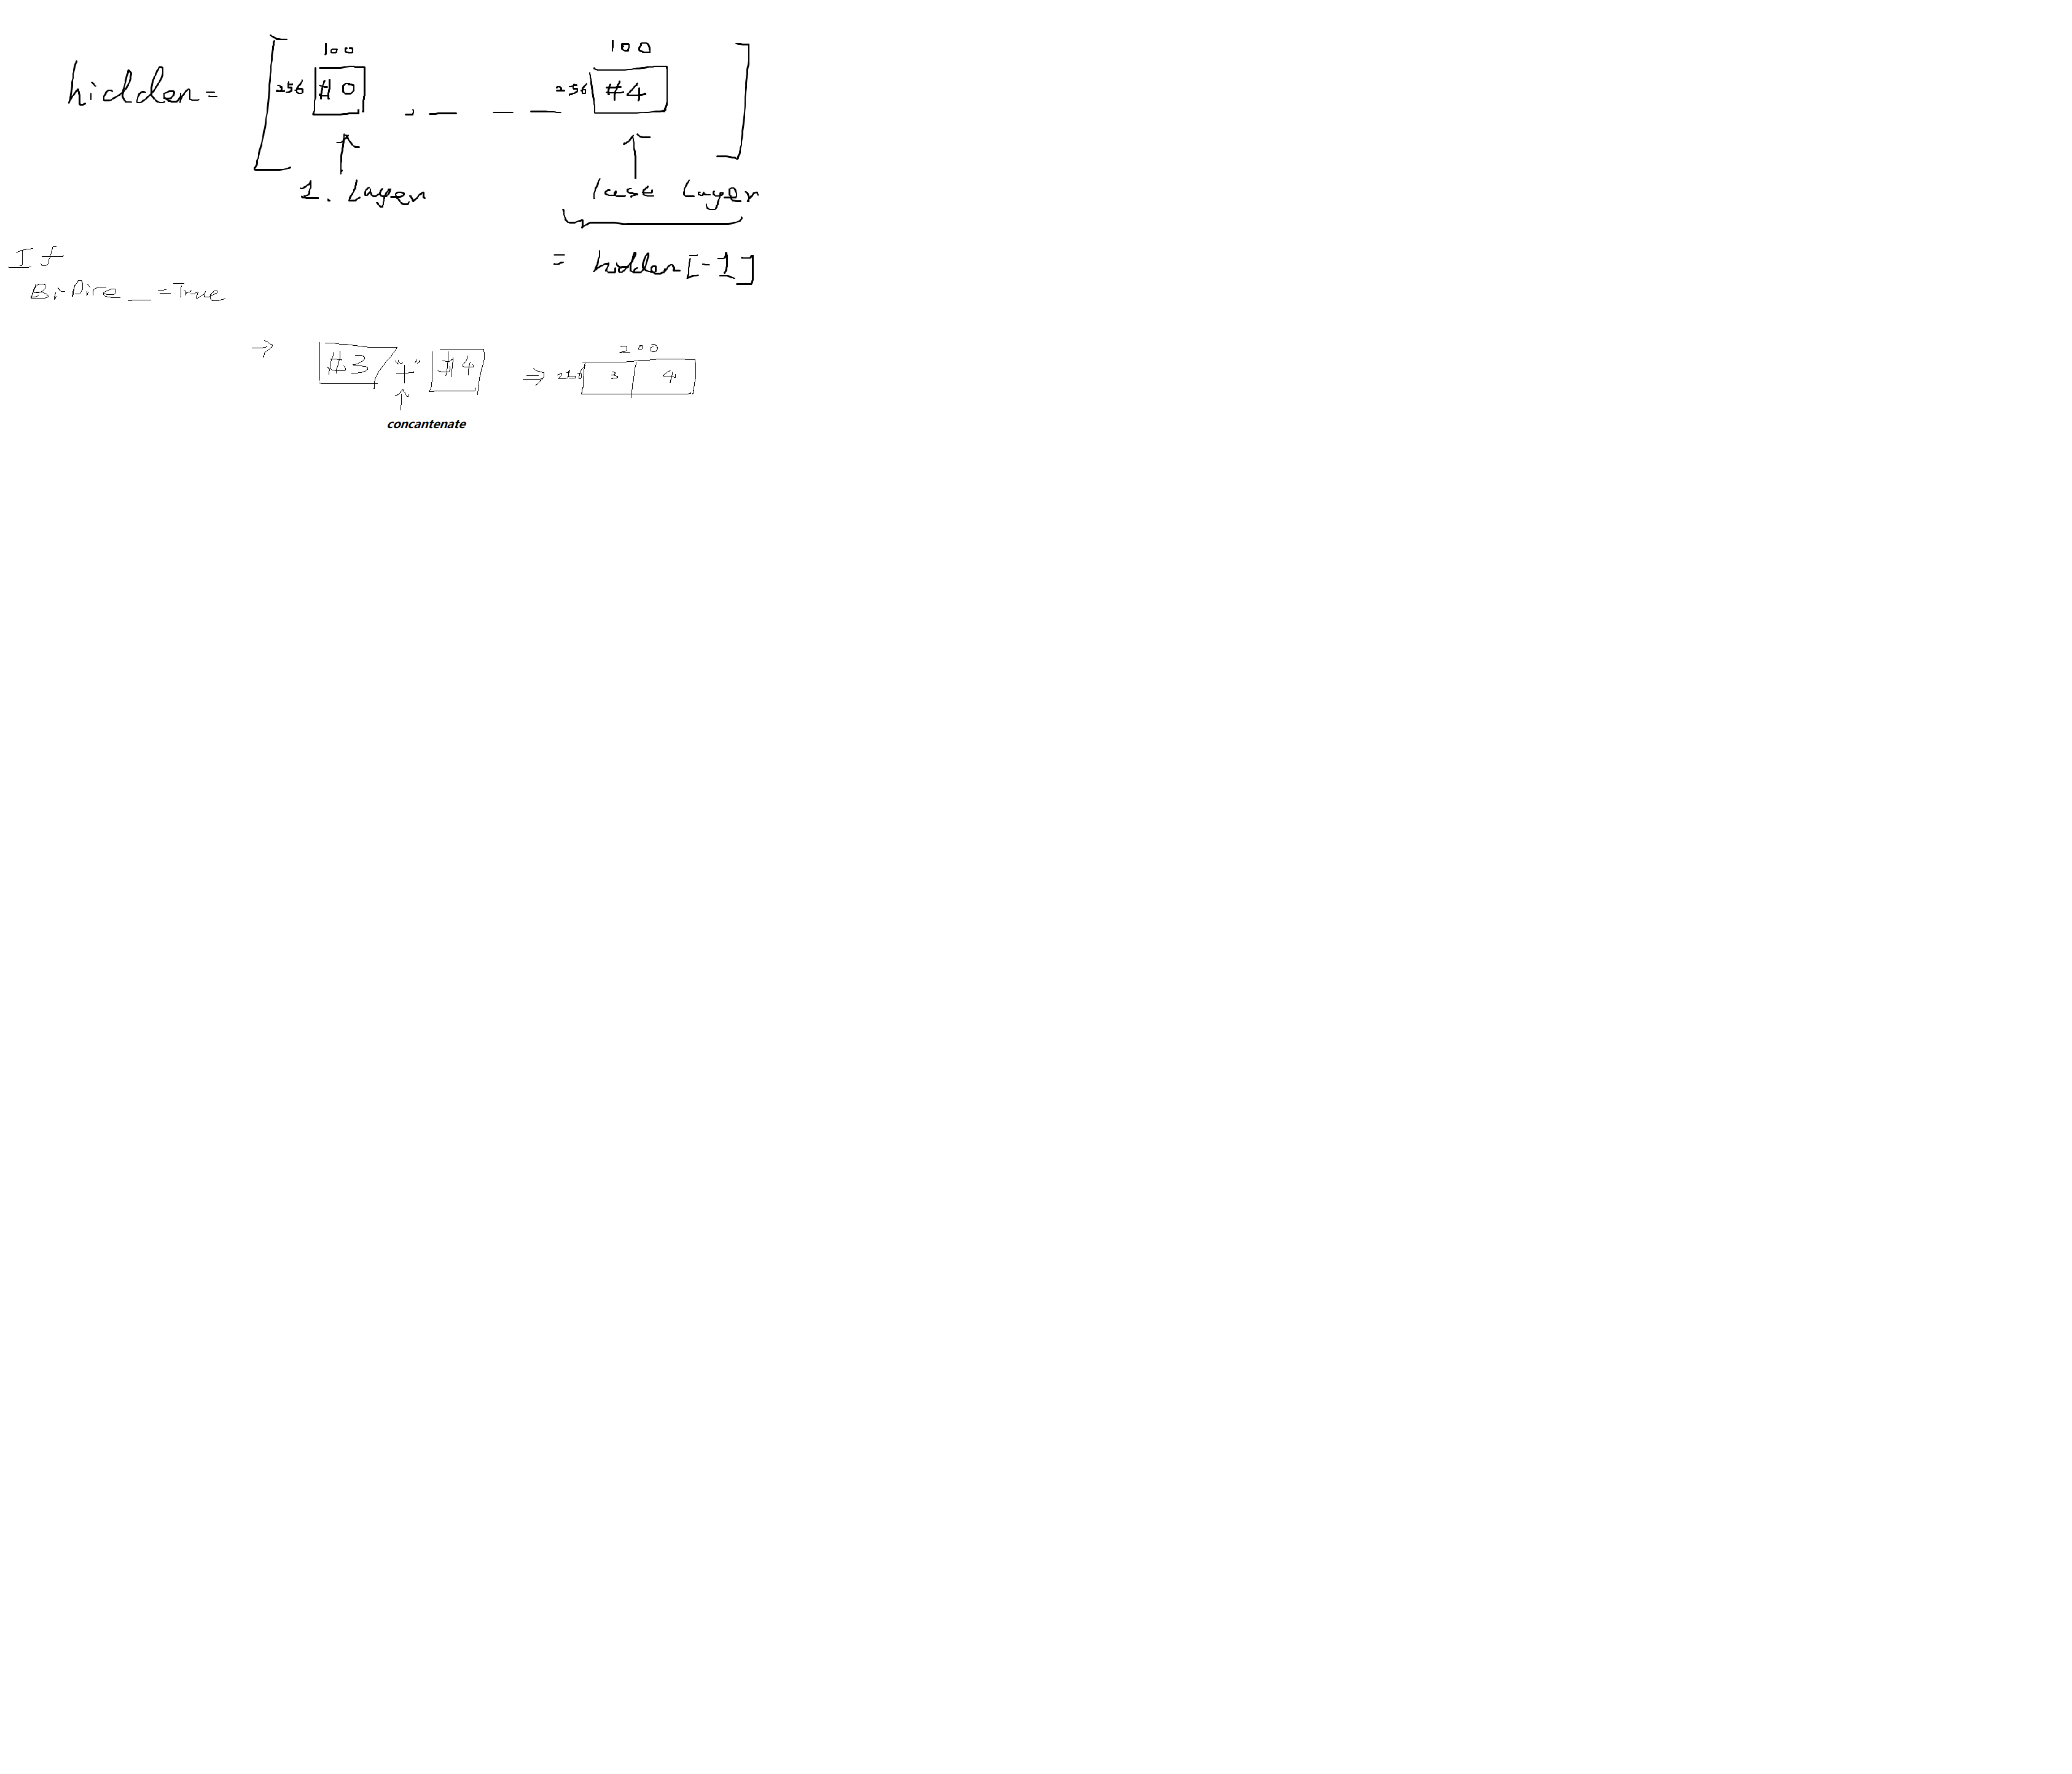

In [64]:
# Parameters

# input to rnncell : 3 * 8 * 10
# This comment out are para settings used in implementation testing
# batch_size = 3
# seq_len = 8
# input_size = 10
# hidden_size = 2
# num_layers = 1
# one_hot_vec_dim = 129
# output_size = 15
#-----------------------------------------------------------------------------------------------------


# This are para settings for sovling task
batch_size = 256
seq_len = 8     #  latter we do not feed this to model, model has to compute it by itself
hidden_size = 100
input_size = 10   
num_layers = 2
one_hot_vec_dim = 129
output_size = 18  # when countries_dic is 1 indexed , output_size has to be 18+1
bidirectional=True

if bidirectional==True :
  D = 2 
else:
  D =1
print(D)


class Model_GRU(torch.nn.Module):
  def __init__(self, input_size, output_size,hidden_size, batch_size,num_layers,one_hot_vec_dim,bidirectional=bidirectional):
    super(Model_GRU, self).__init__()
    self.output_size = output_size
    self.batch_size = batch_size
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.one_hot_vec_dim = one_hot_vec_dim

    if bidirectional==True :
      D = 2 
    else:
      D =1

    self.embedding = torch.nn.Embedding(num_embeddings=one_hot_vec_dim, embedding_dim=input_size)  
    self.rnncell = torch.nn.GRU(input_size, hidden_size, num_layers,bidirectional=bidirectional)
    self.fc = torch.nn.Linear(hidden_size * D, output_size)
    
  def forward(self, input):                          #  : input ( num_Batch:N , sequen_length:L )---> ( N, num_classes )
    input = torch.transpose(input,1,0)                   # N,L ---> L,N   256 * 8-->  8 * 256
    input = self.embedding(input)                      # L,N --->   ( L, N, Hidden:H ): 8*256--->8* 256 *10
    hidden = self.init_hidden()                       # ---> ( D*num_layers, N, H)
    out,hidden = self.rnncell(input, hidden)                # L,N,H ; D*num_layers,N,H--->  ( num_layers*D , N , H )

    if bidirectional==True:
      hidden_cat = torch.cat([hidden[-1],hidden[-2]], dim=1)       # ( num_layers*D , N , H)---> ( N,D*H )
    else:
      hidden_cat = hidden[-1]                       # ( num_layers*D , N , H)---> ( N,D*H )

    fc_output = self.fc(hidden_cat)                     # ( N,D*H ) ---> (N x num_classes)
    return fc_output

  def init_hidden(self):
    hidden = torch.zeros(D* num_layers, batch_size, hidden_size)
    return hidden.to(device) 
    

2


### Test of model 

In [138]:

# Instantiate a Model
RNNNet_with_GRU = Model_GRU(input_size,output_size, hidden_size, batch_size,num_layers,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional).to(device)
# hidden = torch.zeros(2,3,2)
# Feed seq_tensor into it seq_tensor: N x L= 3 x 8 ---> out , hidden

# make a input that suits to the new para settings

seq_tensor = torch.zeros(56,8).long().to(device)  # ---> input: (num_Batch,sequen_length)
# seq_tensor.device

prediction_ = RNNNet_with_GRU.forward(seq_tensor)
# print('*'*30)
# print('output tensor shape: L x Batch x H*D')
# print(out.shape)
print('*'*30)
print('prediction_ tensor shape:   Batch x num_classes')
print(prediction_.shape)



******************************
prediction_ tensor shape:   Batch x num_classes
torch.Size([56, 18])


## **Initialize model**

In [79]:
RNNNet_with_GRU_1 = Model_GRU(input_size,output_size, hidden_size, batch_size,num_layers,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional).to(device)
RNNNet_with_GRU = RNNNet_with_GRU_1

### Define:  Optimizer and Loss

In [80]:
# Initialize Model &Loss & Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(RNNNet_with_GRU.parameters(), lr=0.001) # lr=0.05


# Training Cycle


####Encapsulize test block as a function


this two functions might be Wrong, it needs further looks

##### Declarations of train() and test()

In [82]:
epoch_list=[]
accuracy_list=[]
loss_list =[]

def train(epoch):
  running_loss = 0.0
  for batch_idx,data in enumerate(trainloader,1):  # data starts with index 0
    names, countries = data  
    seq_tensor,seq_lenths,countries = make_tensors(names, countries)

    # Forward
    countries_pred = RNNNet_with_GRU(seq_tensor)
    
    # For Debugging purpose
    #print(countries_pred.shape)
    #print(countries.shape)
    loss = criterion(countries_pred,countries)
    
    # Backward & zeroing previous gradient
    optimizer.zero_grad()# before backwards, gradient is set to ZERO again so it doenst influents next iteration,otherwise it will accumulate
    loss.backward()#bp计算 weights 的gradient

    # gradient clipping
    torch.nn.utils.clip_grad_norm(RNNNet_with_GRU_1.parameters(),max_norm=1)
    # Update
    optimizer.step()
    # record loss
    running_loss += loss.item()
    
    #print outcome after each time 300 iteration has been done
    if batch_idx % 32 == 0:
      print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx + 1,running_loss/300))
      running_loss = 0.0
  epoch_list.append(epoch)
  loss_list.append(running_loss)
  print(running_loss)


# Definition of Test

def test():
  correct = 0
  total = 0
  with torch.no_grad():   #  这样申明则后面的计算中不会再计算梯度
    for batch_idx,data in enumerate(testloader,1):
      names, countries = data  
      seq_tensor,seq_lenths,countries = make_tensors(names, countries)
      # Only for debugging purpose
      #print(seq_tensor.shape) # N,L

      outputs = RNNNet_with_GRU(seq_tensor) #输出的每一行对应每一图像对各个分类的概率
      __,predicted = torch.max(outputs.data,dim = 1)  # 求每一行最大值的下标★ 取得最大值的index放在predicated 中  ★
                                # max returns ： 1. the actual maximum，2. its index
      total += countries.size(0)   # labels.size = [N,1]
      correct += (predicted ==countries).sum().item()
  print('Accuracy on test set:%d %%' %(100*correct/total))  # 百分比输出格式
  
  accuracy_list.append(correct/total)

##### Test case of function test()

problem found , you need to activate drop last=True in trainloader definition, otherwise the rest of data can not form a full batch and is not fit to network setting ,it therefore triggered a errror

In [83]:

test() # after new configuration in testloader with drop_last =True ,it is working

Accuracy on test set:1 %


<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()


#####Test case of Train()

Error: Target 18 is out of bounds. **solved** by setting y_batch from 0idex to 1index
https://discuss.pytorch.org/t/indexerror-target-is-out-of-bounds/84417


 

In [84]:
train(epoch=1)

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()
<ipython-input-82-40e5f0b64951>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(RNNNet_with_GRU_1.parameters(),max_norm=1)


[2,   33]loss:0.219
36.82845902442932


###Bring everything together

In [85]:
acc_list=[]
for epoch in range(20):
  # Train cycle
  train(30)
  acc = test()
  acc_list.append(acc)

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()
<ipython-input-82-40e5f0b64951>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(RNNNet_with_GRU_1.parameters(),max_norm=1)


[31,   33]loss:0.198
36.72402501106262
Accuracy on test set:47 %
[31,   33]loss:0.199
36.464948415756226
Accuracy on test set:47 %
[31,   33]loss:0.197
37.01613962650299
Accuracy on test set:47 %
[31,   33]loss:0.198
36.861807346343994
Accuracy on test set:47 %
[31,   33]loss:0.198
36.77560007572174
Accuracy on test set:47 %
[31,   33]loss:0.196
37.256418228149414
Accuracy on test set:47 %
[31,   33]loss:0.194
37.708799958229065
Accuracy on test set:47 %
[31,   33]loss:0.195
37.54996883869171
Accuracy on test set:47 %
[31,   33]loss:0.198
36.6327942609787
Accuracy on test set:47 %
[31,   33]loss:0.196
37.11311388015747
Accuracy on test set:47 %
[31,   33]loss:0.196
37.19072151184082
Accuracy on test set:47 %
[31,   33]loss:0.196
37.09042835235596
Accuracy on test set:47 %
[31,   33]loss:0.197
36.93521225452423
Accuracy on test set:47 %
[31,   33]loss:0.198
36.59906566143036
Accuracy on test set:47 %
[31,   33]loss:0.197
36.68087577819824
Accuracy on test set:47 %
[31,   33]loss:0.196
3

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()
<ipython-input-82-40e5f0b64951>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(RNNNet_with_GRU_1.parameters(),max_norm=1)


[31,   33]loss:0.199
36.26656210422516
Accuracy on test set:47 %
[31,   33]loss:0.195
37.20446968078613
Accuracy on test set:47 %
[31,   33]loss:0.196
36.888649702072144
Accuracy on test set:47 %
[31,   33]loss:0.197
36.76343262195587
Accuracy on test set:47 %
[31,   33]loss:0.197
36.650067925453186
Accuracy on test set:47 %
[31,   33]loss:0.196
36.953712463378906
Accuracy on test set:47 %
[31,   33]loss:0.197
36.60896098613739
Accuracy on test set:47 %
[31,   33]loss:0.197
36.880480885505676
Accuracy on test set:47 %
[31,   33]loss:0.197
36.70532298088074
Accuracy on test set:47 %
[31,   33]loss:0.194
37.44525730609894
Accuracy on test set:47 %
[31,   33]loss:0.196
37.09383535385132
Accuracy on test set:47 %
[31,   33]loss:0.196
37.04644811153412
Accuracy on test set:47 %
[31,   33]loss:0.197
36.745269656181335
Accuracy on test set:47 %
[31,   33]loss:0.197
36.615737438201904
Accuracy on test set:47 %
[31,   33]loss:0.196
37.0247004032135
Accuracy on test set:47 %
[31,   33]loss:0.197

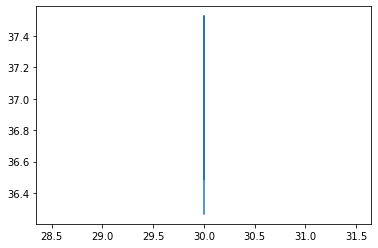

In [86]:
import matplotlib.pyplot as plt
# This are para settings for sovling task
batch_size = 256
seq_len = 8     #  latter we do not feed this to model, model has to compute it by itself
hidden_size = 100
input_size = 10   
num_layers = 2
one_hot_vec_dim = 129
output_size = 18  # when countries_dic is 1 indexed , output_size has to be 18+1
bidirectional=True




if __name__ == '__main__':
  classifier = Model_GRU(input_size,output_size, hidden_size, batch_size,num_layers=2,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional)
  if USE_GPU:
    device = torch.device("cuda:0")
    classifier.to(device)
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(classifier.parameters(), lr=3)

  epoch_list=[]
  accuracy_list=[]
  loss_list =[]
  acc_list=[]
  for epoch in range(30):
    # Train cycle
    train(30)
    acc = test()
    acc_list.append(acc)
plt.plot(epoch_list,loss_list)
plt.show() 

In [87]:
def trainModel():
  total_loss = 0
  for i, (names, countries) in enumerate(trainloader, 1):
    inputs, seq_lengths, target = make_tensors(names, countries)
    output = classifier(inputs)  # only for accelarate , seq_lengths)
    loss = criterion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    if i % 10 == 0:
      print(f'[{i * len(inputs)}/{len(trainset)}] ', end='')
      print(f'loss={total_loss / (i * len(inputs))}')
  return total_loss

def testModel():
  correct = 0
  total = len(testset)
  print("evaluating trained model ...")
  with torch.no_grad():
    for i, (names, countries) in enumerate(testloader, 1):
      inputs, seq_lengths, target = make_tensors(names, countries)
      output = classifier(inputs)  # only for accelarate , seq_lengths)
      pred = output.max(dim=1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()
    percent = '%.2f' % (100 * correct / total)
    print(f'Test set: Accuracy {correct}/{total} {percent}%')
  return correct / total

  

# **Encapsulation everything like what is done in CNN-cifar10**

In [88]:
# Import
import numpy as np
import os
from os import path
from torch.utils.tensorboard import SummaryWriter

gpu_available = torch.cuda.is_available()
if gpu_available:
    device = "cuda" 
    print("Cuda is available")
else: 
  device = "cpu"
  print("CUDA is not available. Execution time on the cpu is slow.")

Cuda is available


In [89]:
# 生成log文件保存的目录文件夹
path_to_logs = "myLogs"
path_to_models = "myModels"
path_to_data = "data"   #  运行后目录下出现三个对应名字的文件夹


# Safe directory creation
def mksafe_dir(path):
    if not os.path.isdir(path):
        os.makedirs(path)

# Make directories if not already available
for directory in [path_to_logs, path_to_models, path_to_data]:
    mksafe_dir(directory)

### Implementing function： **train_model()**
-----------------------------------


first need to implement validate functions we ll implment it after validations_funcions()

##### This is the default criterion we use:
--------------------------------


In [90]:
criterion = torch.nn.CrossEntropyLoss()


the following is a script what has to be done in that model


1.   model paramter settings
2.   model trainning settings
3.   initialize model
4.   



### Implement **Validation of single batch()** & **Validate_model()**

#### Possible Improvement in validation of single batch() & validate_model()



1. A better way is to remove that maketensor_part in model.forward and validate)single batch fun, and then place maketensor at the beginning in the for loop of the train block


2. For validate_Model it is better to include maketensor function inside it
---------------------------------------------
this could improve codes efficiency but hurt its reusability（ so maybe don make the change is better）

####Implement : **Validation of single batch （）**

In [91]:
def validate_single_batch(model: torch.nn.Module, batch, labels):

    batch, seq_lengths, labels = make_tensors(batch, labels)
    model.eval()
    with torch.no_grad():
        top_1_accuracy = []
        predictions = model.forward(batch)
        predictions = predictions.argmax(dim=1,keepdim=True)
        top_1 = predictions==labels
        top_1 = top_1.type(torch.float)
        top_1_accuracy.append(top_1.mean().cpu())
    return np.mean(top_1_accuracy)



###### **Test** of validate_single_batch

In [114]:
# Test of validate_single_batch
dataiter = iter(trainloader)
batch_test, labels_test = next(dataiter)
#inputs, seq_lengths, target = make_tensors(batch_test, labels_test)

result_test = validate_single_batch(RNNNet_with_GRU_1,batch_test, labels_test)
result_test

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()


0.50390625

####Implement : **Validate_model（）**

In [93]:
def validate_model(model: torch.nn.Module, data):
    
    model.eval()
    with torch.no_grad():
        top_1_accuracy = []
        for batch, labels in data:
          batch, seq_lengths, labels = make_tensors(batch, labels)
          labels = labels.to(device)
          predictions = model(batch.to(device))
          predictions = predictions.argmax(dim=1,keepdim=True)  # 区别max 与argmax：argmax 取index
          top_1 = predictions==labels
          top_1 = top_1.type(torch.float)
          top_1_accuracy.append(top_1.mean().cpu())
    return np.mean(top_1_accuracy)



##### **Test** of validate_model

In [113]:
test_rsult=validate_model(RNNNet_with_GRU_1,trainloader)
test_rsult

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()


0.4691256

###  Implementation of **initialize_model()** function

In [134]:



def initialize_baseline_model(input_size,output_size, hidden_size, batch_size,num_layers=2,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional):
  baseline_model = Model_GRU(input_size,output_size, hidden_size, batch_size,num_layers=2,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional)
  baseline_model = baseline_model.to(device)
  return baseline_model



###  Implementation of **Train_model()** function

In [126]:
def train_model(epochs, model, dataloader_train, dataloader_val, optimizer, loss_function, writer, val_step=2, identifier=None):
  
  # this blcok under can not be used for Generalization of other deep learning project so it is commented out by me

 # To log the loss
  epoch_loss =[]
  epoch_acc =[]
  for epoch in range(epochs):
    
    cur_loss = []
    cur_acc = [] 
  
    for batch_idx, (batch, labels) in enumerate(dataloader_train,1):
      model.train()# set up to train model
      batch_1,labels_1 = batch, labels # save it for validate_single_batch, otherwise, both of them gonna be overwritte into tensor form
      batch, seq_lengths, labels = make_tensors(batch, labels)
      #Reset the optimizer 
      optimizer.zero_grad()
      prediction = model(batch)

      #Backpropagate the error
      loss = loss_function(prediction,labels)
      loss.backward()
      #Gradient clipping
      torch.nn.utils.clip_grad_norm(model.parameters(),max_norm=1)
      #Update the Weights based on the error
      optimizer.step()

      cur_acc.append(validate_single_batch(model,batch_1,labels_1))  #  us the unswiched form we have make tensor inside validate_single_batchI()
      cur_loss.append(loss.item())                  # a better way is to remove that maketensor_part in each fun, and place maketensor at the beginning in the for loop of the train block
                                      # for model.forward and validate single_batch ,is better to remove maketensor ,(but so it need to place make tensor and beginning of for loop)
    # Validate the model every n-th episode           # For validate_Model it is better to include maketensor function inside it
    if epoch % val_step ==0:
      val_score= validate_model(model,dataloader_val)
      print(f"Validation score after epoch {epoch}:{val_score:.3f}")
      writer.add_scalar("Acc/val", val_score, epoch//val_step)  #  what does this line do ? 
    epoch_loss.append(np.mean(cur_loss))
    epoch_acc.append(np.mean(cur_acc))

    for name, layer in model.named_children():  # how exactly does this part work ?
        if hasattr(layer, "weight"):
            writer.add_histogram(f"Histogram/{name}", layer.weight, epoch)
            writer.add_histogram(f"Histogram/{name}", layer.weight, epoch)
    writer.add_scalar("Loss/train", epoch_loss[-1], epoch)
    writer.add_scalar("Acc/train", epoch_acc[-1], epoch)

    print(f"Finished epoch {epoch+1}: Average Loss= {epoch_loss[-1]}, Accuracy= {epoch_acc[-1]}")

  return model, epoch_loss, epoch_acc

## **Use the block to train model with variate settings**


After implementation of those blocks ， we are ready to train the model with different settings ， when you have somehing to try out， you can make a code block **using the code block under as a pattern.**
------------------------
in this way each code block will basically not interfere with others
I have adapted it from the CNN cifar 10



####   1 Basic GRU_MODEL with learnning rate = 0.001





In [140]:

identifier = 'GRU_lr0001_CE'
model_path = path.join(path_to_models, identifier) 
mksafe_dir(model_path)  # 运行后mymodels 文件夹下会出现一个 名为 GRU_lr0001_CE 的子文件夹

# model settings
batch_size = 16    #  remember to change the dataloader's batch size after modefied batch size 
seq_len = 8     #  latter we do not feed this to model, model has to compute it by itself
hidden_size = 100
input_size = 10   
num_layers = 2
one_hot_vec_dim = 129
output_size = 18  # when countries_dic is 1 indexed , output_size has to be 18+1
bidirectional=True


# traning settings
Learning_rate = 0.0001
epochs = 100

# initialize model
baseline_model_3 = initialize_baseline_model(input_size,output_size, hidden_size, batch_size,num_layers,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional)
writer = SummaryWriter(path.join(path_to_logs, identifier))
optimizer = torch.optim.Adam(baseline_model_3.parameters(), Learning_rate)

#  Train this is the most important part
exp_model, exp_loss, exp_acc=train_model(epochs, baseline_model_3, trainloader, testloader, optimizer, criterion, writer, val_step=2, identifier=identifier)

#
writer.flush() #Python file method flush() flushes the internal buffer,why used here I dunno
torch.save(exp_model, path.join(model_path, identifier + "_model.pt"))
validation_score = validate_model(exp_model, testloader)

print(f"The {identifier} model has a validation score of {validation_score}")

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()
<ipython-input-126-a215cc9f90f2>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),max_norm=1)


Validation score after epoch 0:0.469
Finished epoch 1: Loss= 1.9094114170103016, Accuracy= 0.4651525020599365
Finished epoch 2: Loss= 1.8447156125200008, Accuracy= 0.4691616892814636
Validation score after epoch 2:0.469
Finished epoch 3: Loss= 1.8449839129419383, Accuracy= 0.46893712878227234
Finished epoch 4: Loss= 1.846206107967628, Accuracy= 0.46893712878227234
Validation score after epoch 4:0.469
Finished epoch 5: Loss= 1.8450405178669684, Accuracy= 0.46908682584762573
Finished epoch 6: Loss= 1.8450608085015576, Accuracy= 0.46908682584762573
Validation score after epoch 6:0.469
Finished epoch 7: Loss= 1.8445025313400223, Accuracy= 0.46908682584762573
Finished epoch 8: Loss= 1.8441908929876225, Accuracy= 0.46901196241378784
Validation score after epoch 8:0.469
Finished epoch 9: Loss= 1.8422751338895924, Accuracy= 0.46908682584762573


KeyboardInterrupt: ignored

GRU_lr001_CE

In [141]:

identifier = 'GRU_lr001_CE'
model_path = path.join(path_to_models, identifier) 
mksafe_dir(model_path)  # 运行后mymodels 文件夹下会出现一个 名为 GRU_lr0001_CE 的子文件夹

# model settings
batch_size = 16
seq_len = 8     #  latter we do not feed this to model, model has to compute it by itself
hidden_size = 100
input_size = 10   
num_layers = 2
one_hot_vec_dim = 129
output_size = 18  # when countries_dic is 1 indexed , output_size has to be 18+1
bidirectional=True


# traning settings
Learning_rate = 0.001
epochs = 200

# initialize model
baseline_model_4 = initialize_baseline_model(input_size,output_size, hidden_size, batch_size,num_layers,one_hot_vec_dim=one_hot_vec_dim,bidirectional=bidirectional)


#  wipe weight 
for layer in baseline_model_4.children():
  if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()


writer = SummaryWriter(path.join(path_to_logs, identifier))
optimizer = torch.optim.Adam(baseline_model_4.parameters(), Learning_rate)

#  Train this is the most important part
exp_model, exp_loss, exp_acc=train_model(epochs, baseline_model_4, trainloader, testloader, optimizer, criterion, writer, val_step=2, identifier=identifier)

#
writer.flush() #Python file method flush() flushes the internal buffer,why used here I dunno
torch.save(exp_model, path.join(model_path, identifier + "_model.pt"))
validation_score = validate_model(exp_model, testloader)

print(f"The {identifier} model has a validation score of {validation_score}")

<ipython-input-77-10e6e0ca6cd4>:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  countries = torch.tensor(countries).long()
<ipython-input-126-a215cc9f90f2>:25: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),max_norm=1)


Validation score after epoch 0:0.469
Finished epoch 1: Loss= 1.87232125455034, Accuracy= 0.46814653277397156
Finished epoch 2: Loss= 1.8516499046080126, Accuracy= 0.46901196241378784
Validation score after epoch 2:0.469
Finished epoch 3: Loss= 1.850695582778154, Accuracy= 0.46901196241378784
Finished epoch 4: Loss= 1.8476154233167272, Accuracy= 0.46901196241378784
Validation score after epoch 4:0.469
Finished epoch 5: Loss= 1.847134202040598, Accuracy= 0.4691616892814636
Finished epoch 6: Loss= 1.8465809288852943, Accuracy= 0.4692365229129791
Validation score after epoch 6:0.469
Finished epoch 7: Loss= 1.8473206564337907, Accuracy= 0.4691616892814636
Finished epoch 8: Loss= 1.8466721927334449, Accuracy= 0.4691616892814636
Validation score after epoch 8:0.469
Finished epoch 9: Loss= 1.8462540521593152, Accuracy= 0.46901196241378784
Finished epoch 10: Loss= 1.8451410262170667, Accuracy= 0.4692365229129791
Validation score after epoch 10:0.469
Finished epoch 11: Loss= 1.8466904996397966, 

#### 2  Speeded up GRU_MODEL with **pack_padded_sequence** ...learnning rate = 0.001
-----------------------------------------------------

https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html

# Conclusion & others

#### A better way to make dictionary

In [ ]:
list1 =torch.arange(1,5).tolist()
countries_list
List3 =dict(zip(countries_list,list1))
print(List3)



####  To get index


```
# output_draft = torch.randn(3,18)
print(output_draft.shape)
print(output_draft)
predictions_draft2 = output_draft.argmax(dim=1,keepdim=True)  # 1.method
print(predictions_draft2)
___,predictions_draft = output_draft.max(dim=1,keepdim=True)  # 2.method
print(predictions_draft)
```



In [ ]:
output_draft = torch.randn(3,18)
print(output_draft.shape)
print(output_draft)
predictions_draft2 = output_draft.argmax(dim=1,keepdim=True)
print(predictions_draft2)
___,predictions_draft = output_draft.max(dim=1,keepdim=True)
print(predictions_draft)